In [1]:
#Keras Package
import keras
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Conv2D, MaxPooling2D, Flatten
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, Adam
from keras.utils import np_utils, plot_model
from keras.callbacks import EarlyStopping
#Numpy
import numpy as np
#Load Data
import h5py, glob
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold, train_test_split
#Visualization
import matplotlib.pyplot as plt
#Timing
from time import time

C:\Users\Nabeel\Anaconda3\envs\env_full\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
#Import data for all 9 subjects seperately 

A01T = h5py.File('project_datasets/A01T_slice.mat', 'r')
X1 = np.copy(A01T['image'])
y1 = np.copy(A01T['type'])
y1 = y1[0,0:X1.shape[0]:1]
y1 = np.asarray(y1, dtype=np.int32)
X1 = X1[:, 0:22, :] #remove EOG lines

A02T = h5py.File('project_datasets/A02T_slice.mat', 'r')
X2 = np.copy(A02T['image'])
y2 = np.copy(A02T['type'])
y2 = y2[0,0:X2.shape[0]:1]
y2 = np.asarray(y2, dtype=np.int32)
X2 = X2[:, 0:22, :] #remove EOG lines

A03T = h5py.File('project_datasets/A03T_slice.mat', 'r')
X3 = np.copy(A03T['image'])
y3 = np.copy(A03T['type'])
y3 = y3[0,0:X3.shape[0]:1]
y3 = np.asarray(y3, dtype=np.int32)
X3 = X3[:, 0:22, :] #remove EOG lines

A04T = h5py.File('project_datasets/A04T_slice.mat', 'r')
X4 = np.copy(A04T['image'])
y4 = np.copy(A04T['type'])
y4 = y4[0,0:X4.shape[0]:1]
y4 = np.asarray(y4, dtype=np.int32)
X4 = X4[:, 0:22, :] #remove EOG lines

A05T = h5py.File('project_datasets/A05T_slice.mat', 'r')
X5 = np.copy(A05T['image'])
y5 = np.copy(A05T['type'])
y5 = y5[0,0:X5.shape[0]:1]
y5 = np.asarray(y5, dtype=np.int32)
X5 = X5[:, 0:22, :] #remove EOG lines

A06T = h5py.File('project_datasets/A06T_slice.mat', 'r')
X6 = np.copy(A06T['image'])
y6 = np.copy(A06T['type'])
y6 = y6[0,0:X6.shape[0]:1]
y6 = np.asarray(y6, dtype=np.int32)
X6 = X6[:, 0:22, :] #remove EOG lines

A07T = h5py.File('project_datasets/A07T_slice.mat', 'r')
X7 = np.copy(A07T['image'])
y7 = np.copy(A07T['type'])
y7 = y7[0,0:X7.shape[0]:1]
y7 = np.asarray(y7, dtype=np.int32)
X7 = X7[:, 0:22, :] #remove EOG lines

A08T = h5py.File('project_datasets/A08T_slice.mat', 'r')
X8 = np.copy(A08T['image'])
y8 = np.copy(A08T['type'])
y8 = y8[0,0:X8.shape[0]:1]
y8 = np.asarray(y8, dtype=np.int32)
X8 = X8[:, 0:22, :] #remove EOG lines

A09T = h5py.File('project_datasets/A09T_slice.mat', 'r')
X9 = np.copy(A09T['image'])
y9 = np.copy(A09T['type'])
y9 = y9[0,0:X9.shape[0]:1]
y9 = np.asarray(y9, dtype=np.int32)
X9 = X9[:, 0:22, :] #remove EOG lines

In [3]:
#Preprocess data

def remove_nan(X):
    idx = 0
    idx_nan = []
    for trial in X:
        if (np.isnan(trial).any()):
            print('Trial %d has nan' % idx)
            idx_nan.append(idx)
        idx += 1
    return np.delete(X,idx_nan,0), np.delete(y,idx_nan,0)

X = np.vstack((X1, X2, X3, X4, X5, X6, X7, X8, X9))
y = np.hstack((y1, y2, y3, y4, y5, y6, y7, y8, y9))

X, y = remove_nan(X) #Remove nans
X = np.expand_dims(X,3) #Expand dimension

#Convert y to one-hot label
encoder = LabelEncoder()
encoder.fit(y)
encoded_y = encoder.transform(y)
y = np_utils.to_categorical(encoded_y)
num_classes = y.shape[1]

#Check whole dimensions
print(X.shape)
print(y.shape)


Trial 56 has nan
Trial 525 has nan
Trial 572 has nan
Trial 689 has nan
Trial 825 has nan
Trial 1008 has nan
Trial 1009 has nan
Trial 1010 has nan
Trial 1043 has nan
Trial 1158 has nan
Trial 1180 has nan
Trial 1209 has nan
Trial 1253 has nan
Trial 1372 has nan
Trial 1377 has nan
Trial 1537 has nan
Trial 1555 has nan
Trial 1580 has nan
Trial 2074 has nan
Trial 2097 has nan
Trial 2140 has nan
Trial 2167 has nan
Trial 2194 has nan
Trial 2291 has nan
Trial 2326 has nan
Trial 2365 has nan
Trial 2396 has nan
Trial 2397 has nan
Trial 2463 has nan
Trial 2506 has nan
Trial 2508 has nan
Trial 2522 has nan
Trial 2543 has nan
Trial 2554 has nan
(2558, 22, 1000, 1)
(2558, 4)


In [4]:
# visualize data:

# EEG reading 1-22 for subject 1, trial 1
# t = np.array(np.arange(0, 1000))
# for i in np.arange(0,22):
#     plt.plot(t, X1[2, i, :])
#     plt.show()

In [5]:
#Deep CNN
def CNN():
    
    activation = 'elu'
    init = 'glorot_uniform'

    model = Sequential()

    #Block 1
    model.add(Conv2D(filters = 25, kernel_size = (10,1), kernel_initializer=init, input_shape=(X.shape[2],X.shape[1], 1)))
    model.add(Conv2D(filters = 25, kernel_size = (1, 22), kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(3, 1), strides=3))
    model.add(Dropout(0.5))


    #Block 2
    model.add(Conv2D(filters = 50, kernel_size = (10, 1), kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(3, 1), strides=3))
    model.add(Dropout(0.5))

    #Block 3
    model.add(Conv2D(filters = 100, kernel_size = (10, 1), kernel_initializer = init))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(3, 1), strides=3))
    model.add(Dropout(0.5))

    #Block 4
    model.add(Conv2D(filters = 200, kernel_size = (10, 1), kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(3, 1), strides=3))
    model.add(Dropout(0.5))

    #Classification Layer
    model.add(Flatten())
    model.add(Dense(units=4, kernel_initializer=init))
    model.add(BatchNormalization())
    model.add(Activation('softmax'))
    return model

In [6]:


# Fix dimensions
def fix_dim(X_train, X_test):
    X_train = X_train.transpose((0,2,1,3))
    X_test = X_test.transpose((0,2,1,3))
    
    return X_train, X_test

Train on 2046 samples, validate on 512 samples
Epoch 1/200
2046/2046 [==============================] - 4s 2ms/step - loss: 1.4503 - acc: 0.2742 - val_loss: 1.3415 - val_acc: 0.3340
Epoch 2/200
2046/2046 [==============================] - 2s 1ms/step - loss: 1.3231 - acc: 0.3734 - val_loss: 1.3162 - val_acc: 0.3613
Epoch 3/200
2046/2046 [==============================] - 2s 1ms/step - loss: 1.2698 - acc: 0.4047 - val_loss: 1.2827 - val_acc: 0.4023
Epoch 4/200
2046/2046 [==============================] - 2s 1ms/step - loss: 1.2325 - acc: 0.4467 - val_loss: 1.2120 - val_acc: 0.4121
Epoch 5/200
2046/2046 [==============================] - 2s 1ms/step - loss: 1.1936 - acc: 0.4658 - val_loss: 1.2444 - val_acc: 0.4180
Epoch 6/200
2046/2046 [==============================] - 2s 1ms/step - loss: 1.1638 - acc: 0.4795 - val_loss: 1.2060 - val_acc: 0.4492
Epoch 7/200
2046/2046 [==============================] - 2s 1ms/step - loss: 1.1659 - acc: 0.4863 - val_loss: 1.1900 - val_acc: 0.4805
Epoch 8/

Epoch 61/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.6112 - acc: 0.7527 - val_loss: 0.7455 - val_acc: 0.7266
Epoch 62/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.5730 - acc: 0.7845 - val_loss: 0.7275 - val_acc: 0.7266
Epoch 63/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.5759 - acc: 0.7908 - val_loss: 0.7214 - val_acc: 0.7188
Epoch 64/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.5522 - acc: 0.7854 - val_loss: 0.7265 - val_acc: 0.7422
Epoch 65/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.5791 - acc: 0.7820 - val_loss: 0.7341 - val_acc: 0.7344
Epoch 66/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.5546 - acc: 0.7908 - val_loss: 0.7490 - val_acc: 0.7129
Epoch 67/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.5201 - acc: 0.7991 - val_loss: 0.7159 - val_acc: 0.7168
Epoch 68/200
2046/2046 [========================

2046/2046 [==============================] - 2s 1ms/step - loss: 0.3937 - acc: 0.8500 - val_loss: 0.7286 - val_acc: 0.7344
Epoch 122/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3757 - acc: 0.8597 - val_loss: 0.7322 - val_acc: 0.7441
Epoch 123/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3545 - acc: 0.8700 - val_loss: 0.6937 - val_acc: 0.7520
Epoch 124/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3673 - acc: 0.8612 - val_loss: 0.7238 - val_acc: 0.7539
Epoch 125/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3904 - acc: 0.8480 - val_loss: 0.6909 - val_acc: 0.7578
Epoch 126/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3908 - acc: 0.8583 - val_loss: 0.7279 - val_acc: 0.7500
Epoch 127/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3943 - acc: 0.8568 - val_loss: 0.7264 - val_acc: 0.7383
Epoch 128/200
2046/2046 [==============================

Epoch 181/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3603 - acc: 0.8661 - val_loss: 0.7036 - val_acc: 0.7422
Epoch 182/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3282 - acc: 0.8690 - val_loss: 0.7320 - val_acc: 0.7422
Epoch 183/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3150 - acc: 0.8793 - val_loss: 0.6981 - val_acc: 0.7324
Epoch 184/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3103 - acc: 0.8803 - val_loss: 0.7031 - val_acc: 0.7461
Epoch 185/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3493 - acc: 0.8666 - val_loss: 0.7735 - val_acc: 0.7227
Epoch 186/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3022 - acc: 0.8827 - val_loss: 0.6735 - val_acc: 0.7520
Epoch 187/200
2046/2046 [==============================] - 2s 1ms/step - loss: 0.3370 - acc: 0.8759 - val_loss: 0.7368 - val_acc: 0.7500
Epoch 188/200
2046/2046 [================

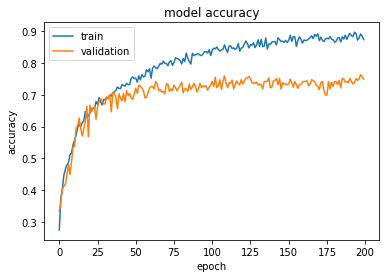

In [7]:
# Train Deep CNN

batch_size = 16
epochs = 200
opt = keras.optimizers.adam(lr=0.001)

CNN = CNN()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
X_train, X_test = fix_dim(X_train, X_test)

CNN.compile(loss='categorical_crossentropy',
             optimizer=opt,
             metrics=['accuracy'])

t0 = time()

history = CNN.fit(X_train, y_train,
                   batch_size=batch_size,
                   validation_data=(X_test, y_test),
                   epochs=epochs,
                   shuffle = True)

t1 = time()
total = t1 - t0
print("Time to train = %f" % total)

# Plot Results
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [8]:
CNN.evaluate(x=X_test, y=y_test)

512/512 [==============================] - 0s 365us/step


[0.6789590865373611, 0.75]